In [1]:
import numpy as np
import pandas as pd
import marshal, json
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.patches as patches
from matplotlib import cm
import matplotlib
import json, math
from operator import sub
import scipy.stats
from IPython.display import set_matplotlib_formats
from IPython.display import Image
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({
    'font.family': 'serif',
    "font.serif": 'Times',
    'font.size': 12,
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'text.latex.preamble': r'\usepackage{amsmath}'
})

In [2]:
v = 44
n = 100
i_rdf = 120
i_cbf = 120
i_sf = 120
i_pf = 120
p = 50
q = 200

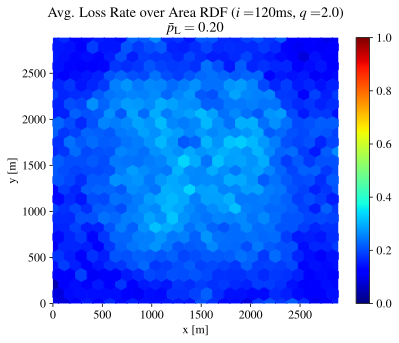

In [3]:
## RDF
parsed_sent_events = pd.read_csv(f'../res/v{v}_parsed/rdf_n{n}_i{i_rdf}_q{q}.csv')
parsed_sent_events = parsed_sent_events[parsed_sent_events['num_possible_receivers'] > 1]
reception_rates = np.array(parsed_sent_events['num_receivers']) / np.array(parsed_sent_events['num_possible_receivers'] - 1)

size = math.sqrt(n / 12) * 1000
fig, ax = plt.subplots()
im = ax.hexbin(
    parsed_sent_events['pos_x'], 
    parsed_sent_events['pos_y'], 
    C=1-reception_rates, 
    vmin=0,
    vmax=1,
    gridsize=25,
    clip_on=True,
    cmap=cm.jet
)

#ax.axis(False)
ax.set_ylim([0,size])
ax.set_xlim([0,size])
ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
plt.title(f'Avg. Loss Rate over Area RDF ($i=${i_rdf}ms, $q=${q/100}) \n$\\bar{{p}}_\\mathrm{{L}} = {1-np.mean(reception_rates):.2f}$')
plt.colorbar(im)

fig.savefig(f"../figures/loss_rate_area_rdf_n{n}_q{q}_v{v}.pdf", dpi=500, bbox_inches='tight', pad_inches=0.01)
fig.savefig(f"../figures/loss_rate_area_rdf_n{n}_q{q}_v{v}.png", dpi=500, bbox_inches='tight', pad_inches=0.01)

plt.show()

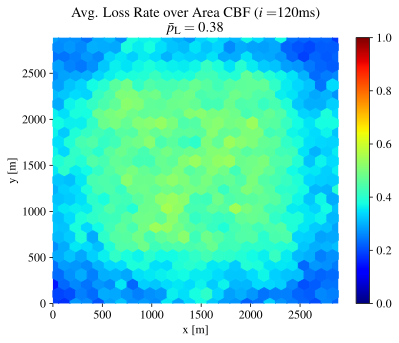

In [4]:
## CBF
parsed_sent_events = pd.read_csv(f'../res/v{v}_parsed/rdf_n{n}_i{i_cbf}_q0.csv')
parsed_sent_events = parsed_sent_events[parsed_sent_events['num_possible_receivers'] > 1]
reception_rates = np.array(parsed_sent_events['num_receivers']) / np.array(parsed_sent_events['num_possible_receivers'] - 1)

size = math.sqrt(n / 12) * 1000
fig, ax = plt.subplots()
im = ax.hexbin(
    parsed_sent_events['pos_x'], 
    parsed_sent_events['pos_y'], 
    C=1-reception_rates, 
    vmin=0,
    vmax=1,
    gridsize=25,
    clip_on=True,
    cmap=cm.jet
)

#ax.axis(False)
ax.set_ylim([0,size])
ax.set_xlim([0,size])
ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
plt.title(f'Avg. Loss Rate over Area CBF ($i=${i_cbf}ms) \n$\\bar{{p}}_\\mathrm{{L}} = {1-np.mean(reception_rates):.2f}$')
plt.colorbar(im)

fig.savefig(f"../figures/loss_rate_area_cbf_n{n}_v{v}.pdf", dpi=500, bbox_inches='tight', pad_inches=0.01)
fig.savefig(f"../figures/loss_rate_area_cbf_n{n}_v{v}.png", dpi=500, bbox_inches='tight', pad_inches=0.01)

plt.show()

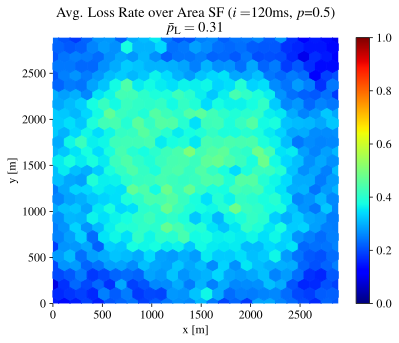

In [5]:
## SF
parsed_sent_events = pd.read_csv(f'../res/v{v}_parsed/sf_n{n}_i{i_sf}_p{p}.csv')
parsed_sent_events = parsed_sent_events[parsed_sent_events['num_possible_receivers'] > 1]
reception_rates = np.array(parsed_sent_events['num_receivers']) / np.array(parsed_sent_events['num_possible_receivers'] - 1)

size = math.sqrt(n / 12) * 1000
fig, ax = plt.subplots()
im = ax.hexbin(
    parsed_sent_events['pos_x'], 
    parsed_sent_events['pos_y'], 
    C=1-reception_rates, 
    vmin=0,
    vmax=1,
    gridsize=25,
    clip_on=True,
    cmap=cm.jet
)

#ax.axis(False)
ax.set_ylim([0,size])
ax.set_xlim([0,size])
ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
plt.title(f'Avg. Loss Rate over Area SF ($i=${i_cbf}ms, $p$={p/100}) \n$\\bar{{p}}_\\mathrm{{L}} = {1-np.mean(reception_rates):.2f}$')
plt.colorbar(im)

fig.savefig(f"../figures/loss_rate_area_sf_n{n}_p{p}_v{v}.pdf", dpi=500, bbox_inches='tight', pad_inches=0.01)
fig.savefig(f"../figures/loss_rate_area_sf_n{n}_p{p}_v{v}.png", dpi=500, bbox_inches='tight', pad_inches=0.01)

plt.show()

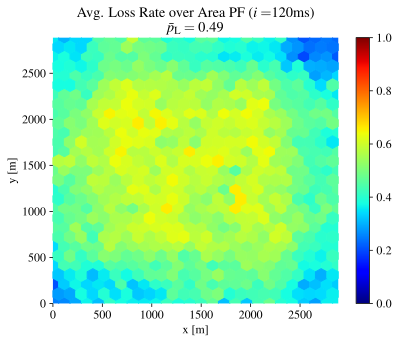

In [6]:
## PF
parsed_sent_events = pd.read_csv(f'../res/v{v}_parsed/sf_n{n}_i{i_pf}_p100.csv')
parsed_sent_events = parsed_sent_events[parsed_sent_events['num_possible_receivers'] > 1]
reception_rates = np.array(parsed_sent_events['num_receivers']) / np.array(parsed_sent_events['num_possible_receivers'] - 1)

size = math.sqrt(n / 12) * 1000
fig, ax = plt.subplots()
im = ax.hexbin(
    parsed_sent_events['pos_x'], 
    parsed_sent_events['pos_y'], 
    C=1-reception_rates, 
    vmin=0,
    vmax=1,
    gridsize=25,
    clip_on=True,
    cmap=cm.jet
)

#ax.axis(False)
ax.set_ylim([0,size])
ax.set_xlim([0,size])
ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
plt.title(f'Avg. Loss Rate over Area PF ($i=${i_cbf}ms) \n$\\bar{{p}}_\\mathrm{{L}} = {1-np.mean(reception_rates):.2f}$')
plt.colorbar(im)

fig.savefig(f"../figures/loss_rate_area_pf_n{n}_v{v}.pdf", dpi=500, bbox_inches='tight', pad_inches=0.01)
fig.savefig(f"../figures/loss_rate_area_pf_n{n}_v{v}.png", dpi=500, bbox_inches='tight', pad_inches=0.01)

plt.show()

In [7]:
print(size / 509.8 * math.sqrt(2))
print(size/33.3)

8.0080088360899
86.68922960805193


In [8]:
size

2886.7513459481293